In [1]:
import os
from copy import deepcopy
from itertools import chain
from collections import Counter



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# import pyiomica as pio
# from pyiomica import categorizationFunctions as cf
# from pyiomica import frequencySubjectMatch as fs
# from pyiomica.extendedDataFrame import DataFrame
# from pyiomica.enrichmentAnalyses import ReactomeAnalysis, ExportReactomeEnrichmentReport
%matplotlib inline

In [5]:
df_nares = pd.read_csv("D:/PES/Projects/ibm_DATATHON/data/nares_16s_abundance.txt",sep='\t')
df_nares.columns = [str(col) + '+nares' for col in df_nares.columns]
df_nares.rename(columns={'HostSampleID+nares': 'SampleID'}, inplace=True)

In [6]:
df_nares.head()

,SampleID,phylum_Actinobacteria+nares,phylum_Bacteroidetes+nares,phylum_Cyanobacteria.Chloroplast+nares,phylum_Firmicutes+nares,phylum_Fusobacteria+nares,phylum_Proteobacteria+nares,phylum_unclassified_Bacteria+nares,class_Actinobacteria+nares,class_Alphaproteobacteria+nares,...,genus_Prevotella+nares,genus_Propionibacterium+nares,genus_Rothia+nares,genus_Staphylococcus+nares,genus_Streptococcus+nares,genus_Streptophyta+nares,genus_Veillonella+nares,genus_unclassified_Actinomycetales+nares,genus_unclassified_Bacteria+nares,genus_unclassified_Neisseriaceae+nares
0,ZOZOW1T-1012,0.060804,0.000823,0.000494,0.106046,0.000000,0.831834,0.000000,0.060804,0.000000,...,0.000000,0.006926,0.000000,0.006087,0.000296,0.000494,0.000000,0.004261,0.000000,0.001217
1,ZOZOW1T-1021,0.337166,0.006810,0.003706,0.441770,0.000357,0.209096,0.000491,0.337166,0.002054,...,0.000067,0.053296,0.000156,0.116058,0.005158,0.003505,0.000335,0.006855,0.000491,0.005984
2,ZOZOW1T-1022,0.603634,0.000525,0.000000,0.194637,0.000000,0.201204,0.000000,0.603634,0.000044,...,0.000022,0.006173,0.000000,0.012127,0.000569,0.000000,0.000219,0.001948,0.000000,0.003699
3,ZOZOW1T-1042,0.771294,0.000000,0.000000,0.185101,0.000000,0.043606,0.000000,0.771294,0.000000,...,0.000000,0.126829,0.000000,0.083176,0.000000,0.000000,0.000000,0.012809,0.000000,0.019237
4,ZOZOW1T-1043,0.869148,0.004393,0.000429,0.116074,0.000000,0.009295,0.000000,0.869148,0.000081,...,0.002017,0.242545,0.000000,0.010222,0.000000,0.000429,0.000325,0.000151,0.000000,0.003639


In [7]:
df_nares.shape

(837, 81)

In [8]:
[col for col in df_nares.columns if df_nares[col].isnull().any()]

[]

In [16]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j])<threshold and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr # extracting a list of columns with high threshold

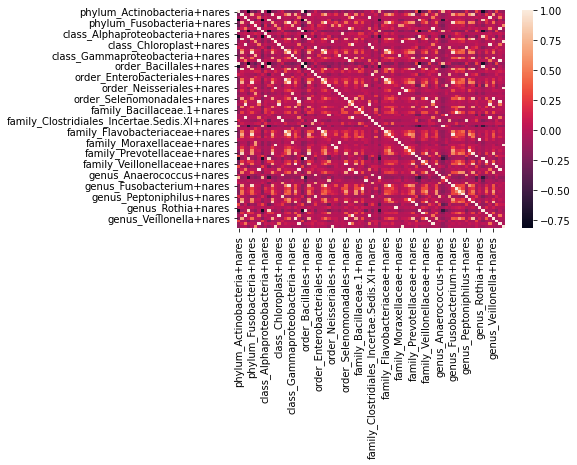

In [11]:
heatmap = sns.heatmap(df_nares.iloc[:,1:].corr())

In [14]:
x=correlation(df_nares,0.8)
print(x)


{'family_Staphylococcaceae+nares', 'class_Fusobacteria+nares', 'genus_Streptophyta+nares', 'order_Bacteroidales+nares', 'class_Bacteroidia+nares', 'order_Actinomycetales+nares', 'order_Flavobacteriales+nares', 'order_unclassified_Bacteria+nares', 'family_Clostridiales_Incertae.Sedis.XI+nares', 'family_Chloroplast+nares', 'genus_Rothia+nares', 'order_Neisseriales+nares', 'genus_Prevotella+nares', 'order_Clostridiales+nares', 'genus_Dolosigranulum+nares', 'genus_Staphylococcus+nares', 'genus_unclassified_Neisseriaceae+nares', 'order_Rhizobiales+nares', 'class_Bacilli+nares', 'genus_Propionibacterium+nares', 'family_Veillonellaceae+nares', 'genus_Actinomyces+nares', 'family_Enterobacteriaceae+nares', 'class_unclassified_Bacteria+nares', 'genus_Peptoniphilus+nares', 'genus_Anaerococcus+nares', 'genus_Streptococcus+nares', 'genus_Gemella+nares', 'genus_Porphyromonas+nares', 'family_unclassified_Bacteria+nares', 'order_Pseudomonadales+nares', 'family_Fusobacteriaceae+nares', 'order_Fusobacte

In [15]:
len(x)

49

In [27]:
y=correlation(df_nares,-0.7)
print(y)


{'order_Bacillales+nares', 'family_Staphylococcaceae+nares', 'genus_Staphylococcus+nares', 'class_Bacilli+nares', 'phylum_Firmicutes+nares'}


In [28]:
len(y)

5

In [22]:
print(df_nares.corr())
np.min(df_nares.corr())
print(np.min(np.min(df_nares.corr())))

                                          phylum_Actinobacteria+nares  \
phylum_Actinobacteria+nares                                  1.000000   
phylum_Bacteroidetes+nares                                  -0.228163   
phylum_Cyanobacteria.Chloroplast+nares                      -0.050808   
phylum_Firmicutes+nares                                     -0.816601   
phylum_Fusobacteria+nares                                   -0.201387   
...                                                               ...   
genus_Streptophyta+nares                                    -0.046595   
genus_Veillonella+nares                                     -0.201504   
genus_unclassified_Actinomycetales+nares                     0.286037   
genus_unclassified_Bacteria+nares                           -0.101637   
genus_unclassified_Neisseriaceae+nares                      -0.138848   

                                          phylum_Bacteroidetes+nares  \
phylum_Actinobacteria+nares                        

C:\Users\Jeffrey\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:85: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [30]:
df_neg=df_nares[['order_Bacillales+nares', 'family_Staphylococcaceae+nares', 'genus_Staphylococcus+nares', 'class_Bacilli+nares', 'phylum_Firmicutes+nares']]
df_neg.shape

(837, 5)

In [32]:
df_pos=df_nares[["SampleID",'family_Staphylococcaceae+nares', 'class_Fusobacteria+nares', 'genus_Streptophyta+nares', 'order_Bacteroidales+nares', 'class_Bacteroidia+nares', 'order_Actinomycetales+nares', 'order_Flavobacteriales+nares', 'order_unclassified_Bacteria+nares', 'family_Clostridiales_Incertae.Sedis.XI+nares', 'family_Chloroplast+nares', 'genus_Rothia+nares', 'order_Neisseriales+nares', 'genus_Prevotella+nares', 'order_Clostridiales+nares', 'genus_Dolosigranulum+nares', 'genus_Staphylococcus+nares', 'genus_unclassified_Neisseriaceae+nares', 'order_Rhizobiales+nares', 'class_Bacilli+nares', 'genus_Propionibacterium+nares', 'family_Veillonellaceae+nares', 'genus_Actinomyces+nares', 'family_Enterobacteriaceae+nares', 'class_unclassified_Bacteria+nares', 'genus_Peptoniphilus+nares', 'genus_Anaerococcus+nares', 'genus_Streptococcus+nares', 'genus_Gemella+nares', 'genus_Porphyromonas+nares', 'family_unclassified_Bacteria+nares', 'order_Pseudomonadales+nares', 'family_Fusobacteriaceae+nares', 'order_Fusobacteriales+nares', 'family_Prevotellaceae+nares', 'family_Carnobacteriaceae+nares', 'order_Selenomonadales+nares', 'order_unclassified_Chloroplast+nares', 'class_Actinobacteria+nares', 'genus_Fusobacterium+nares', 'class_Chloroplast+nares', 'family_Pasteurellaceae+nares', 'order_Bacillales+nares', 'genus_unclassified_Bacteria+nares', 'family_Flavobacteriaceae+nares', 'genus_Corynebacterium+nares', 'genus_Veillonella+nares', 'genus_unclassified_Actinomycetales+nares', 'family_Moraxellaceae+nares', 'family_Neisseriaceae+nares']]
df_pos.shape

(837, 50)

In [35]:
reduced_nares= pd.concat([df_pos,df_neg], join='inner',axis=1)
reduced_nares.shape

(837, 55)

In [36]:
reduced_nares.head()

,SampleID,family_Staphylococcaceae+nares,class_Fusobacteria+nares,genus_Streptophyta+nares,order_Bacteroidales+nares,class_Bacteroidia+nares,order_Actinomycetales+nares,order_Flavobacteriales+nares,order_unclassified_Bacteria+nares,family_Clostridiales_Incertae.Sedis.XI+nares,...,genus_Corynebacterium+nares,genus_Veillonella+nares,genus_unclassified_Actinomycetales+nares,family_Moraxellaceae+nares,family_Neisseriaceae+nares,order_Bacillales+nares,family_Staphylococcaceae+nares,genus_Staphylococcus+nares,class_Bacilli+nares,phylum_Firmicutes+nares
0,ZOZOW1T-1012,0.006087,0.000000,0.000494,0.000181,0.000181,0.060804,0.000461,0.000000,0.004228,...,0.049058,0.000000,0.004261,0.829925,0.001596,0.006959,0.006087,0.006087,0.101818,0.106046
1,ZOZOW1T-1021,0.116058,0.000357,0.003505,0.005894,0.005894,0.337099,0.000246,0.000491,0.043806,...,0.273890,0.000335,0.006855,0.194807,0.006698,0.116214,0.116058,0.116058,0.392471,0.441770
2,ZOZOW1T-1022,0.012127,0.000000,0.000000,0.000022,0.000022,0.603634,0.000503,0.000000,0.007158,...,0.593608,0.000219,0.001948,0.196892,0.003699,0.013834,0.012127,0.012127,0.187261,0.194637
3,ZOZOW1T-1042,0.083176,0.000000,0.000000,0.000000,0.000000,0.771294,0.000000,0.000000,0.060665,...,0.631656,0.000000,0.012809,0.000000,0.019237,0.083176,0.083176,0.083176,0.124436,0.185101
4,ZOZOW1T-1043,0.010222,0.000000,0.000429,0.003616,0.003616,0.868140,0.000000,0.000000,0.029497,...,0.625445,0.000325,0.000151,0.000000,0.003697,0.010222,0.010222,0.010222,0.083054,0.116074


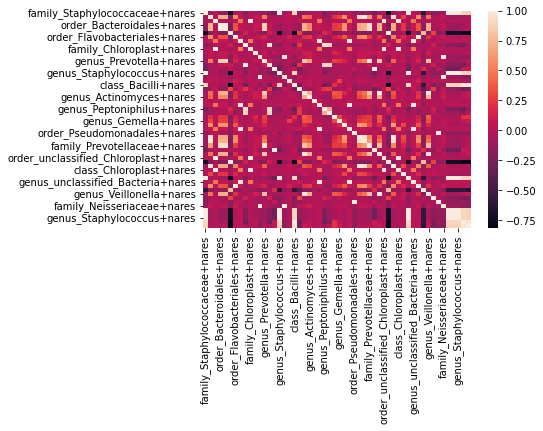

In [38]:
heatmap = sns.heatmap(reduced_nares.iloc[:,1:].corr())

In [37]:
reduced_nares.to_csv("Reduced_nares.csv")